In [2]:

import sys
sys.path.append('..')
from src.evo_eq_model import *

In [3]:
8e-4*2/3 /52

1.0256410256410258e-05

In [4]:
import random
import numpy.random as rnd
import networkx as nx
from anytree import Node
from tqdm import tqdm
import numpy as np
import os
import sys


if(sys.version_info[1]<= 7):
    import pickle5 as pickle
else:
    import pickle
    
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
fmt = lambda x, pos: '{:.3f}'.format(x)
from numba import jit

#matplotlib.use('TkAgg')
from matplotlib.lines import Line2D
plt.rc('mathtext', default='regular')

# sns.set(context='poster')
sns.set_style("white")
plt.rc('lines', linewidth=3.0)
plt.rcParams['xtick.labelsize']=30
plt.rcParams['ytick.labelsize']=30
plt.rcParams['axes.labelsize']=35
plt.rcParams['legend.fontsize']= 25
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['image.cmap']='coolwarm'
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['figure.titlesize'] = 40

In [7]:
# Define the columns from your table
columns = ['Alpha', 'Delta', 'BA.1', 'BA.2', 'BA.4/5', 'BA.4.6', 'BA.5.9', 'BQ.1.1', 'XBB', 'BF.7', 'BM.1.1', 'BN.1', 'CH.1']

# Data in rows corresponds to each variant across different columns
data = [
    [6.6, 5.0, 1.5, 1.8, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
    [4.7, 6.6, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8],
    [2.2, 1.8, 6.6, 5.3, 4.0,3.0, 3.0, 1.6, 1.3, 2.9, 1.9, 3.2, 1.5],
    [2.2, 1.8, 4.7, 6.6, 5.2, 4.2,4.2, 2.9, 1.6, 3.7, 2.3, 3.0, 1.7],
    [2.2, 1.8, 5.3, 7.3, 6.6, 5.8, 5.3, 4.3, 3.0, 5.3, 3.1, 3.4, 2.7],
    [9.0, 8.3, 7.1, 10.5, 9.8, 9.4, 9.4, 7.3, 6.6, 9.5, 7.8, 7.8, 5.7]
]

# Create DataFrame
df = pd.DataFrame(data, columns=columns, index=['Alpha', 'Delta', 'BA.1', 'BA.2', 'BA.4/5', 'vac'])
print(df.T)

def hill_function(T):
    T50= 4.2
    lmbd = 0.9
    try:
        return 1/(1 + np.exp(-lmbd*(T-T50)))
    except:
        return np.nan
    
hill_df = df.map(hill_function)

hill_df[['Alpha', 'Delta', 'BA.1', 'BA.2', 'BA.4/5']].T

        Alpha  Delta  BA.1  BA.2  BA.4/5   vac
Alpha     6.6    4.7   2.2   2.2     2.2   9.0
Delta     5.0    6.6   1.8   1.8     1.8   8.3
BA.1      1.5    1.8   6.6   4.7     5.3   7.1
BA.2      1.8    1.8   5.3   6.6     7.3  10.5
BA.4/5    1.5    1.8   4.0   5.2     6.6   9.8
BA.4.6    1.5    1.8   3.0   4.2     5.8   9.4
BA.5.9    1.5    1.8   3.0   4.2     5.3   9.4
BQ.1.1    1.5    1.8   1.6   2.9     4.3   7.3
XBB       1.5    1.8   1.3   1.6     3.0   6.6
BF.7      1.5    1.8   2.9   3.7     5.3   9.5
BM.1.1    1.5    1.8   1.9   2.3     3.1   7.8
BN.1      1.5    1.8   3.2   3.0     3.4   7.8
CH.1      1.5    1.8   1.5   1.7     2.7   5.7


,Alpha,Delta,BA.1,BA.2,BA.4/5,vac
Alpha,0.896600,0.610639,0.141851,0.141851,0.141851,0.986875
Delta,0.672607,0.896600,0.103400,0.103400,0.103400,0.975636
BA.1,0.080913,0.103400,0.896600,0.610639,0.729088,0.931502
BA.2,0.103400,0.103400,0.729088,0.896600,0.942133,0.996564
BA.4/5,0.080913,0.103400,0.455121,0.710950,0.896600,0.993568


In [ ]:
logbins

array([14.59905085, 10.83815154,  8.04610724,  5.97332871,  4.43452402,
        3.2921348 ,  2.44403942,  1.8144241 ,  1.3470056 ,  1.        ])

(0.18805575270030175, 8.443905000362646)

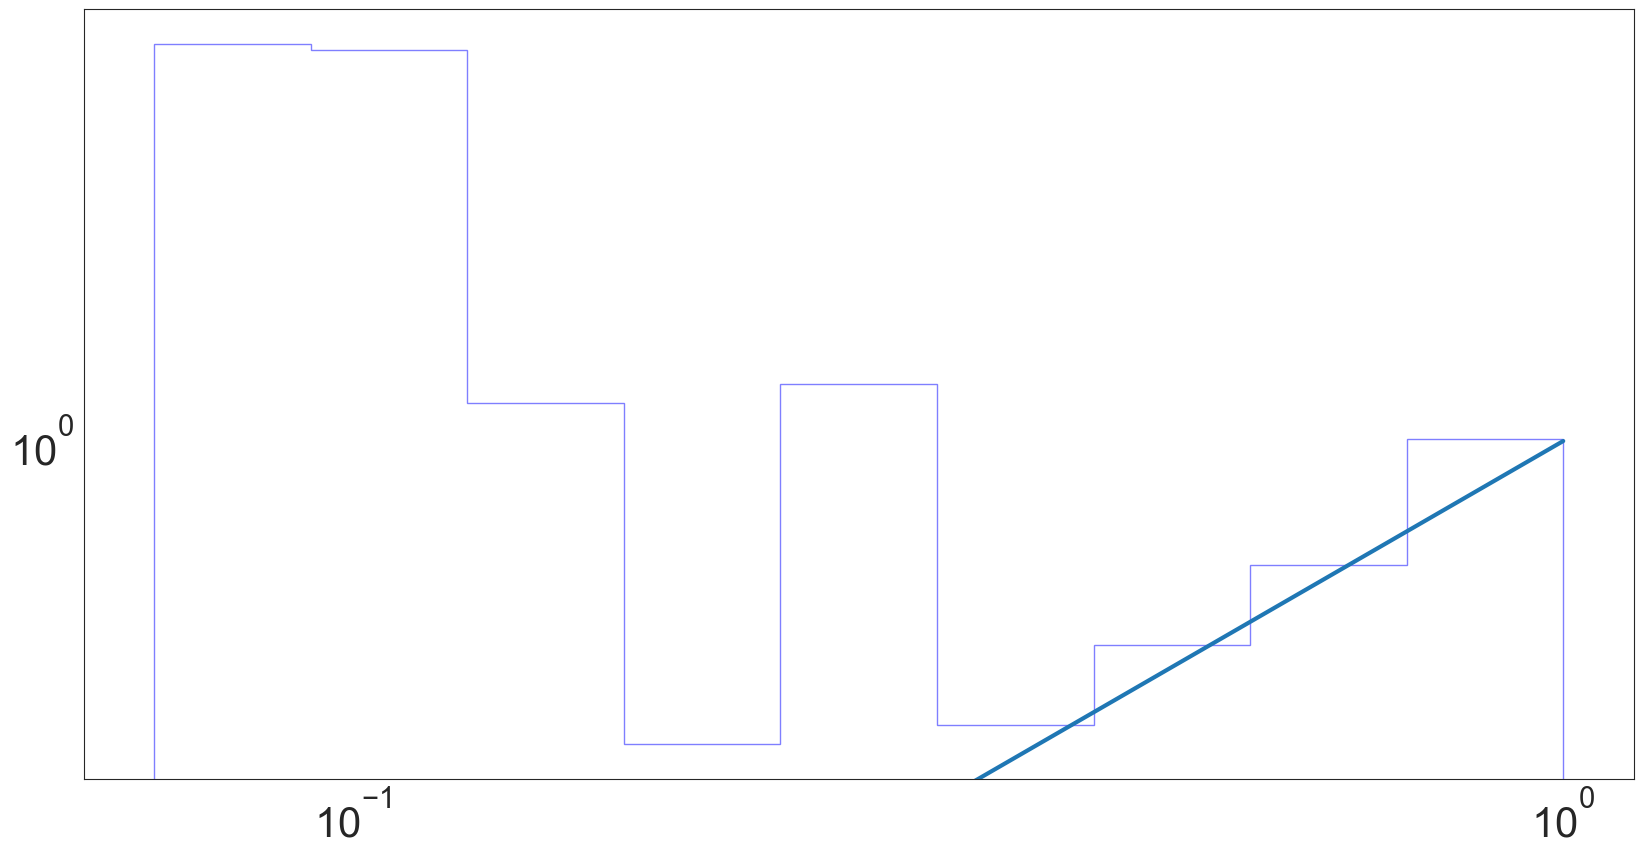

In [ ]:
fig,ax = plt.subplots()
logbins = np.logspace(np.log10(hill_df.values.min()), 0, 10)
plt.hist(hill_df.values.flatten(), bins=logbins,density=True, alpha=0.5, color='blue', histtype='step');

ax.set_xscale('log')
ax.set_yscale('log')
ylim = ax.get_ylim()

delta = 1/2.5

ax.plot(logbins, logbins**(1/delta-1))
ax.set_ylim(ylim)

In [ ]:
uday = 2e-6
uyear = uday*365

print(f'uday = {uday:.1e}, uyear = {uyear:.1e}')

uday = 2.0e-06, uyear = 7.3e-04
